
<h1 align="center" style="background-color:MediumSeaGreen; font-size:48px" ><br> Bike Rental<br></h1>

**Predication of bike rental count on daily based on the
environmental and seasonal settings.**<br>
The details of data attributes in the dataset are as follows -

* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - Whether or not the day was a weekday
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* registered - The number of registered riders (people who had already signed up)
* cnt - The total number of bike rentals (casual + registered)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("icefire")
sns.set_context("paper", font_scale=1.5)

%matplotlib inline

In [84]:
bike_rental = pd.read_csv('/home/woodman/Downloads/day (2).csv')
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [86]:
for i in bike_rental.columns:
    print(i,":", bike_rental[i].nunique())

instant : 731
dteday : 731
season : 4
yr : 2
mnth : 12
holiday : 2
weekday : 7
workingday : 2
weathersit : 3
temp : 499
atemp : 690
hum : 595
windspeed : 650
casual : 606
registered : 679
cnt : 696


In [87]:
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



<h1 align="center" style="background-color:rgb(200, 200, 200); font-size:24px" " ><br>Data Preprocessing<br></h1>



### Renaming variable names

In [88]:
bike_rental = bike_rental.rename(columns = {'dteday':'date','yr': 'year', 'mnth':'month','hum':'humidity', 'cnt':'count'})
bike_rental.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
bike_rental["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Mapping categorical variable numeric values to Text 


In [90]:
seasons = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weathers = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow or Rain'}
weekday = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6:'Sun'}
years = {0: '2011', 1: '2012'}
months = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}



bike_rental['season'] = bike_rental['season'].map(seasons)
bike_rental['weathersit'] = bike_rental['weathersit'].map(weathers)
bike_rental['weekday'] = bike_rental['weekday'].map(weekday)
bike_rental['year'] = bike_rental['year'].map(years)
bike_rental['month'] = bike_rental['month'].map(months)

bike_rental['holiday'] = np.where(bike_rental['holiday']==1, 'Holiday', 'No Holiday')
bike_rental['workingday'] = np.where(bike_rental['workingday']==1, 'Working Day', 'No Working Day')



bike_rental.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,No Holiday,Sun,No Working Day,Misty+Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No Holiday,Mon,No Working Day,Misty+Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No Holiday,Thu,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [91]:
categorical_variable = ["season","year","month","holiday","weekday","workingday","weathersit"]
numerical_variable = ["temp", "atemp","humidity", "windspeed","casual","registered","count"]
for var in categorical_variable:
    bike_rental[var] = bike_rental[var].astype("category")

bike_rental['date'] = pd.to_datetime(bike_rental['date'],yearfirst=True)

#Converting rest variables into float64 for standardization
for i in range(0, bike_rental.shape[1]):
    if(bike_rental.iloc[:,i].dtype == 'int64'):
        bike_rental.iloc[:,i] = bike_rental.iloc[:,i].astype('float')

In [92]:
cat_data = bike_rental[categorical_variable]
cat_data.head()

,season,year,month,holiday,weekday,workingday,weathersit
0,Spring,2011,Jan,No Holiday,Sun,No Working Day,Misty+Cloudy
1,Spring,2011,Jan,No Holiday,Mon,No Working Day,Misty+Cloudy
2,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear
3,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear
4,Spring,2011,Jan,No Holiday,Thu,Working Day,Clear


In [93]:
num_data = bike_rental[numerical_variable]
num_data.head()

,temp,atemp,humidity,windspeed,casual,registered,count
0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [94]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null float64
date          731 non-null datetime64[ns]
season        731 non-null category
year          731 non-null category
month         731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
humidity      731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
count         731 non-null float64
dtypes: category(7), datetime64[ns](1), float64(8)
memory usage: 57.8 KB




<h1 align="center" style="background-color:rgb(200, 200, 200); font-size:24px" " ><br>Missing value <br></h1>


In [95]:
bike_rental.isna().sum()

instant       0
date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


<h1 align="center" style="background-color:rgb(200, 200, 200); font-size:24px " ><br>Exploratory Data Analysis <br></h1>


#### Summary statistic

In [96]:
bike_rental.describe()

,instant,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Univariate analysis

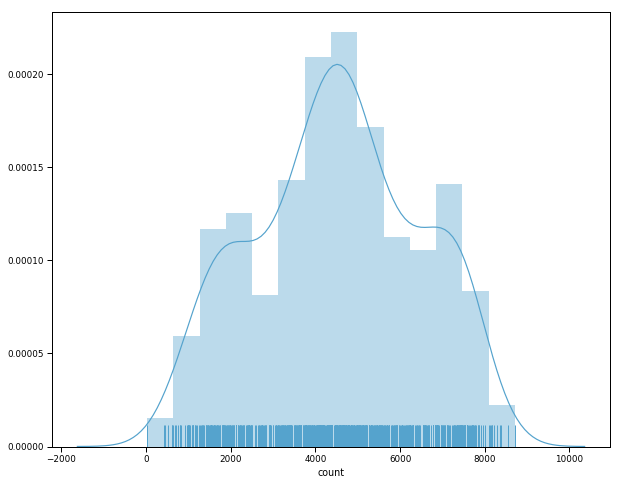

In [97]:
#Distribution of Response Variable 'count'
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.distplot(bike_rental['count'], rug=True)


from scipy.stats import kurtosis, skew

#Observation : Target variable is approximately normally distributed with thin tail ends

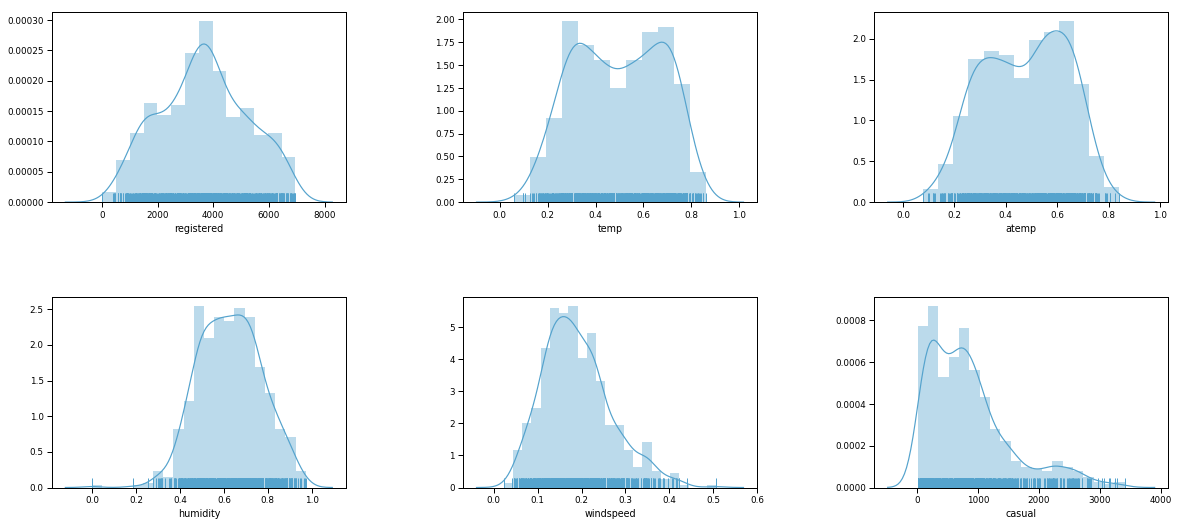

In [98]:
fig = plt.figure(figsize=(20,14))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.distplot(bike_rental['registered'],ax=ax,  rug=True)
ax = fig.add_subplot(3, 3, 2)
sns.distplot(bike_rental['temp'],ax=ax,  rug=True)
ax = fig.add_subplot(3, 3, 3)
sns.distplot(bike_rental['atemp'],ax=ax,  rug=True)
ax = fig.add_subplot(3, 3, 4)
sns.distplot(bike_rental['humidity'],ax=ax,   rug=True)
ax = fig.add_subplot(3, 3, 5)
sns.distplot(bike_rental['windspeed'],ax=ax,  rug=True)
ax = fig.add_subplot(3, 3, 6)
sns.distplot(bike_rental['casual'],ax=ax,  rug=True)
plt.show()

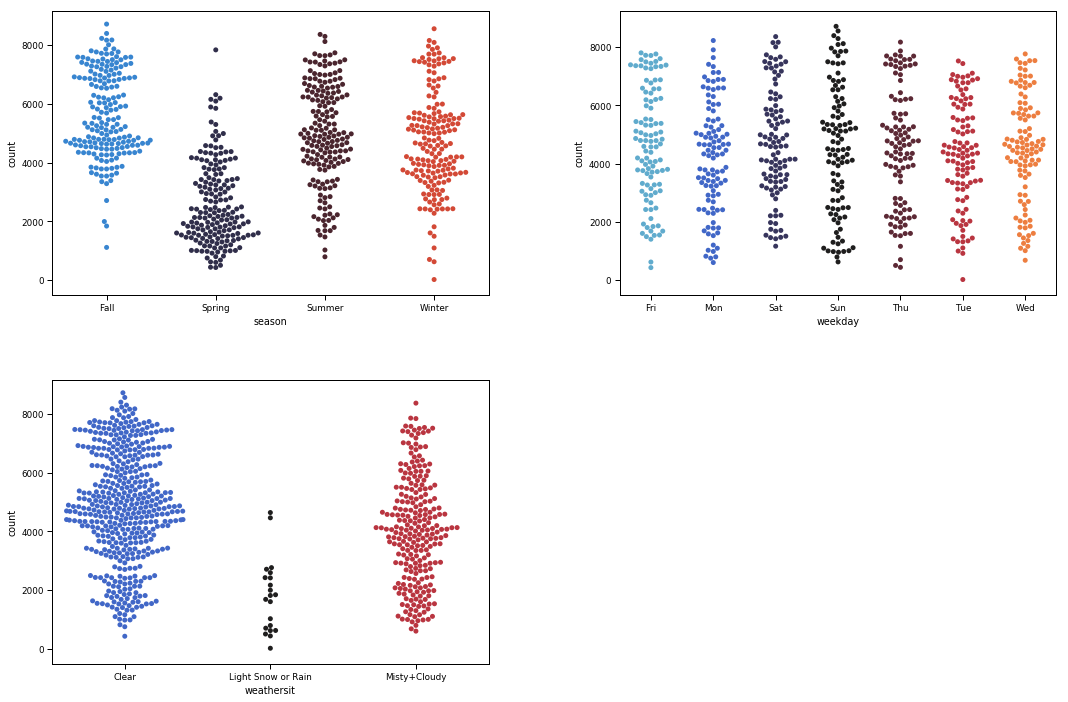

In [99]:
fig = plt.figure(figsize=(18,12))
fig.subplots_adjust(hspace=0.3, wspace=0.3, )
ax = fig.add_subplot(2, 2, 1)
sns.swarmplot(y = bike_rental['count'],  x = bike_rental['season'],palette="icefire" )
ax = fig.add_subplot(2, 2, 2)
sns.swarmplot(y = bike_rental['count'],  x = bike_rental['weekday'],palette="icefire")
ax = fig.add_subplot(2, 2, 3)
sns.swarmplot(y = bike_rental['count'],  x = bike_rental['weathersit'],palette="icefire")

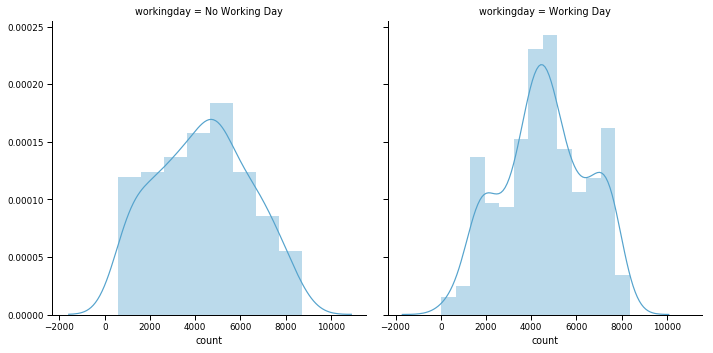

In [100]:
g = sns.FacetGrid(bike_rental, col="workingday", height=5,aspect=1 )
g.map(sns.distplot, "count");

<Figure size 1440x720 with 0 Axes>

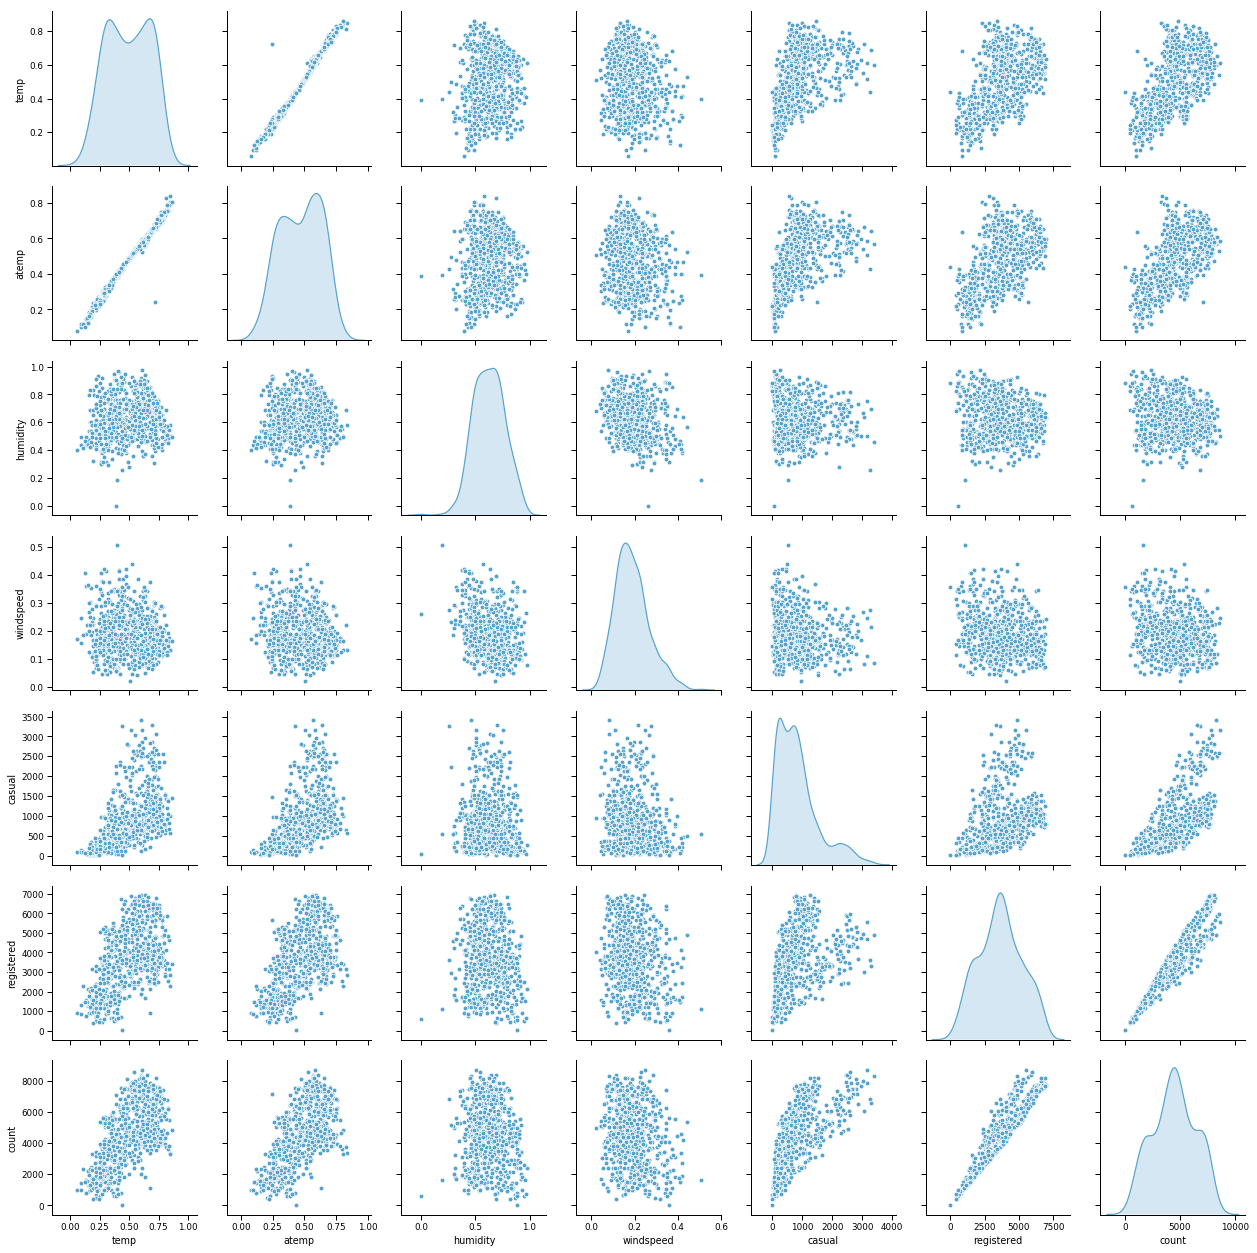

In [101]:
plt.figure(figsize=(20,10))
sns.pairplot(num_data, palette='gnuplot2', diag_kind="kde")

### Casual vs Registered users

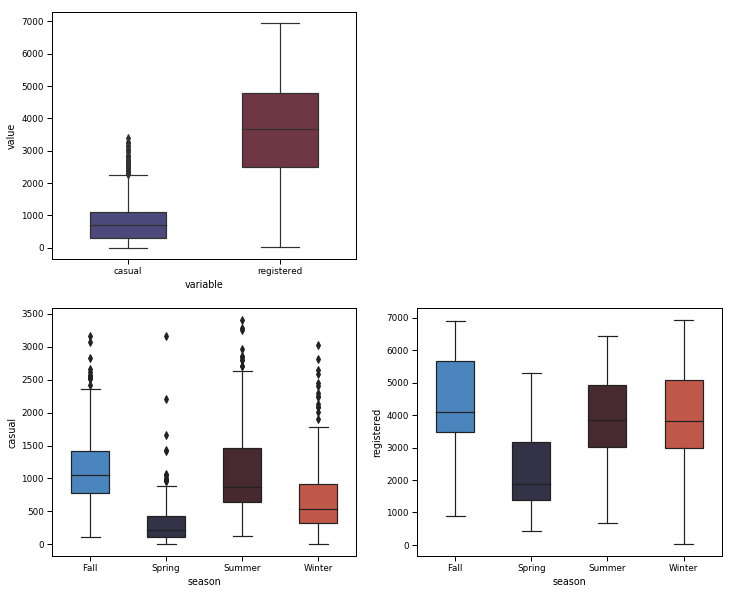

In [102]:
#plotting the box plot for casual vs registered users
season_group= (bike_rental.groupby("season"))["count"].sum()
df = bike_rental[['casual','registered']]

fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(x="variable", y="value", data=pd.melt(df), width=0.5, palette="icefire")

ax = fig.add_subplot(2, 2, 3)
season_group.reset_index(name="total_rentals")
sns.boxplot(y='casual',x='season',data=bike_rental,width=0.5,palette="icefire")

ax = fig.add_subplot(2, 2, 4)
season_group.reset_index(name="total_rentals")
sns.boxplot(y='registered',x='season',data=bike_rental,width=0.5,palette="icefire")


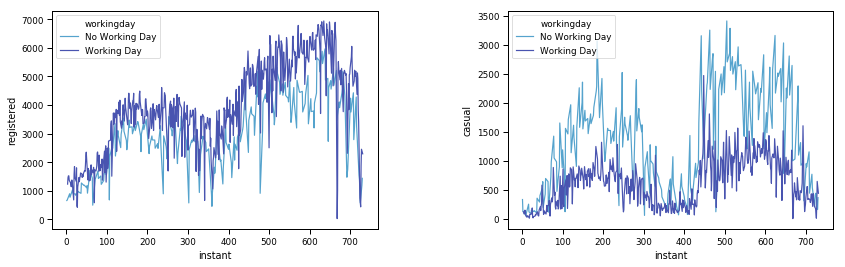

In [103]:
fig = plt.figure(figsize=(14,4))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
sns.lineplot(x = bike_rental.instant, y= bike_rental.registered, hue=bike_rental.workingday,)
ax = fig.add_subplot(1, 2, 2)
sns.lineplot(x = bike_rental.instant, y= bike_rental.casual, hue=bike_rental.workingday, )


### Change of Rentals yearwise

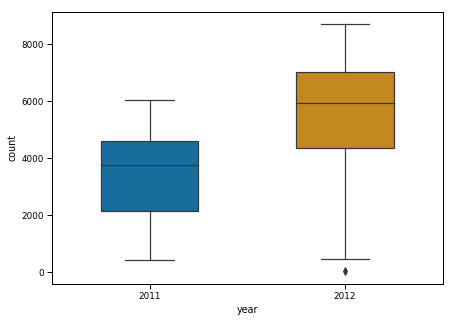

year
2011    1243103.0
2012    2049576.0
Name: count, dtype: float64

In [104]:
#annual change
year_group= (bike_rental.groupby("year"))["count"].sum()
year_group.reset_index(name="total_rentals")
plt.figure(figsize=(7,5))
sns.boxplot(y='count',x='year',data=bike_rental,width=0.5,palette="colorblind")
plt.show()
year_group

### Rentals in different seasons

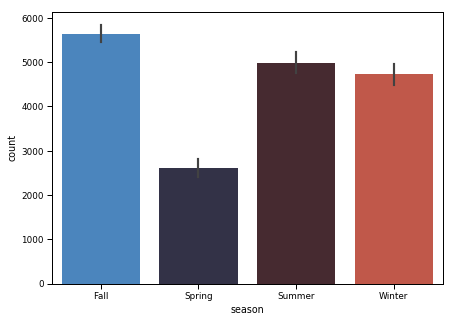

In [105]:
plt.figure(figsize=(7,5))
sns.barplot(x='season',y='count',data=bike_rental,palette="icefire" )

##  Working Day vs different seasons

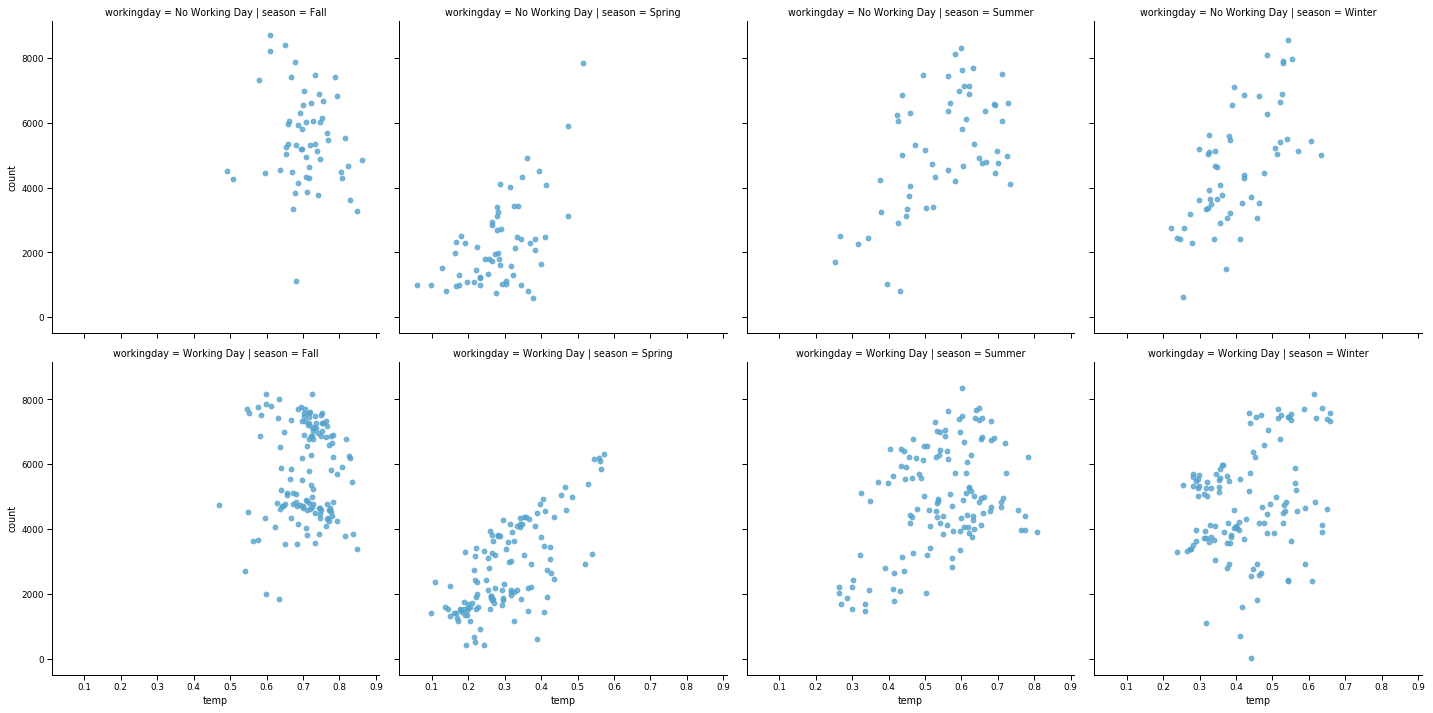

In [106]:
sns.lmplot('temp','count',row='workingday',col='season',data=bike_rental,fit_reg=False)

<Figure size 720x1008 with 0 Axes>

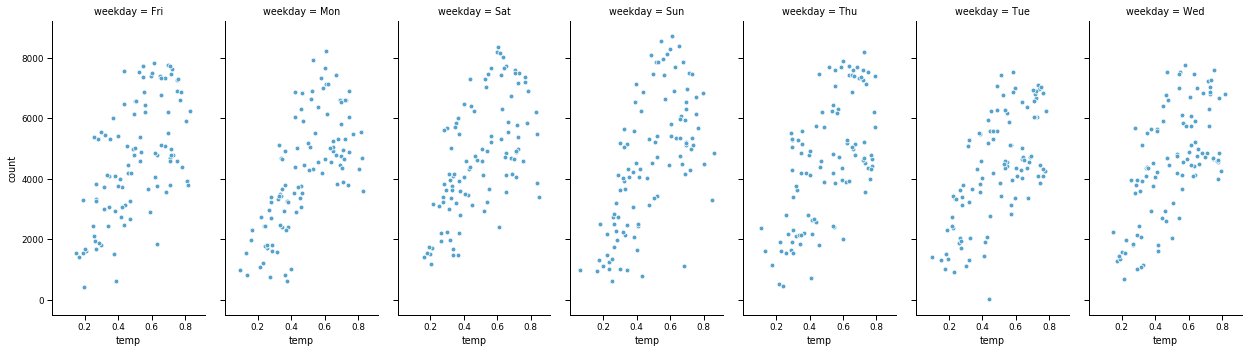

In [107]:
plt.figure(figsize=(10,14))
g = sns.FacetGrid(bike_rental, col="weekday",height=5,aspect=0.5 )
g.map(sns.scatterplot, "temp","count",);

## Rentals monthwise

,month,total_rentals
0,Apr,269094.0
1,Aug,351194.0
2,Dec,211036.0
3,Feb,151352.0
4,Jan,134933.0
5,July,344948.0
6,June,346342.0
7,Mar,228920.0
8,May,331686.0
9,Nov,254831.0


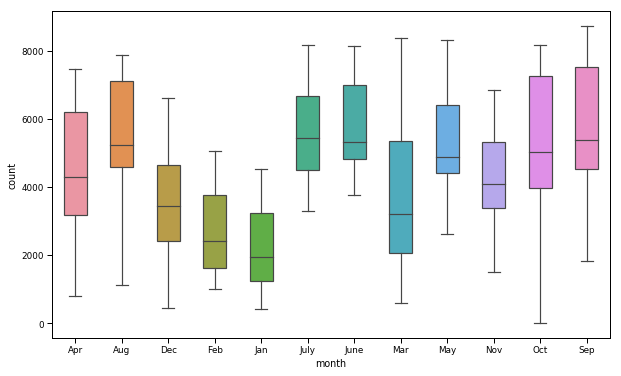

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(y='count',x='month',data=bike_rental,width=0.5,)

bike_rental.groupby("month")["count"].sum().reset_index(name="total_rentals")

<Figure size 864x432 with 0 Axes>

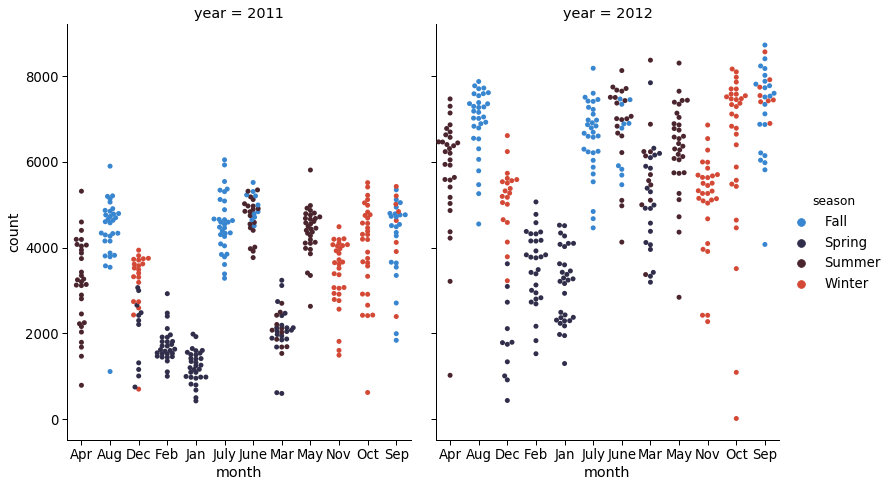

In [109]:
plt.figure(figsize=(12,6))
sns.set_context("paper", font_scale=1.5)

sns.catplot(x="month", y="count", hue="season",
            col="year", aspect=.8,
            kind="swarm", data=bike_rental, height=7, palette="icefire");

<Figure size 720x1008 with 0 Axes>

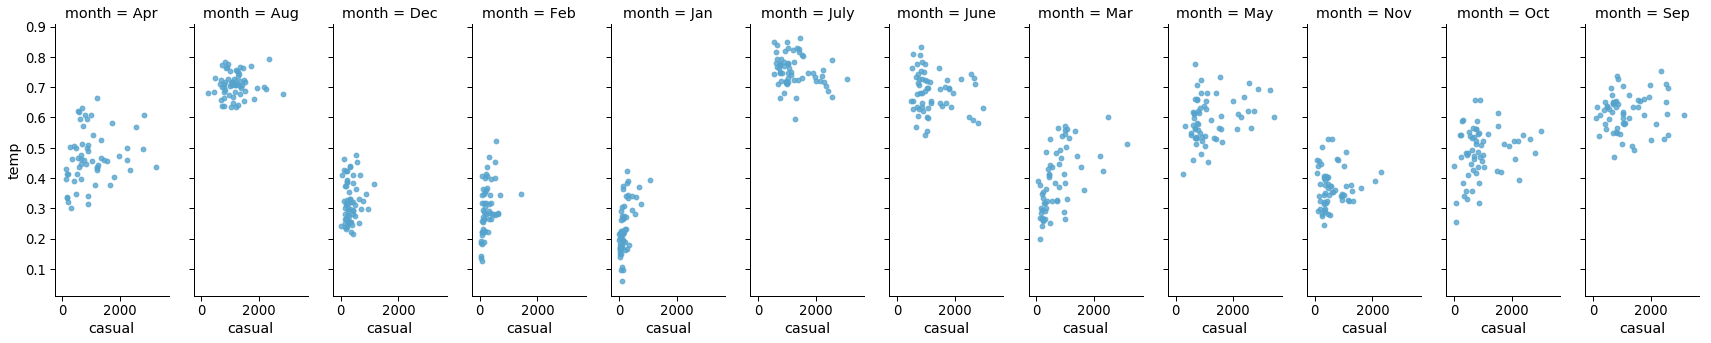

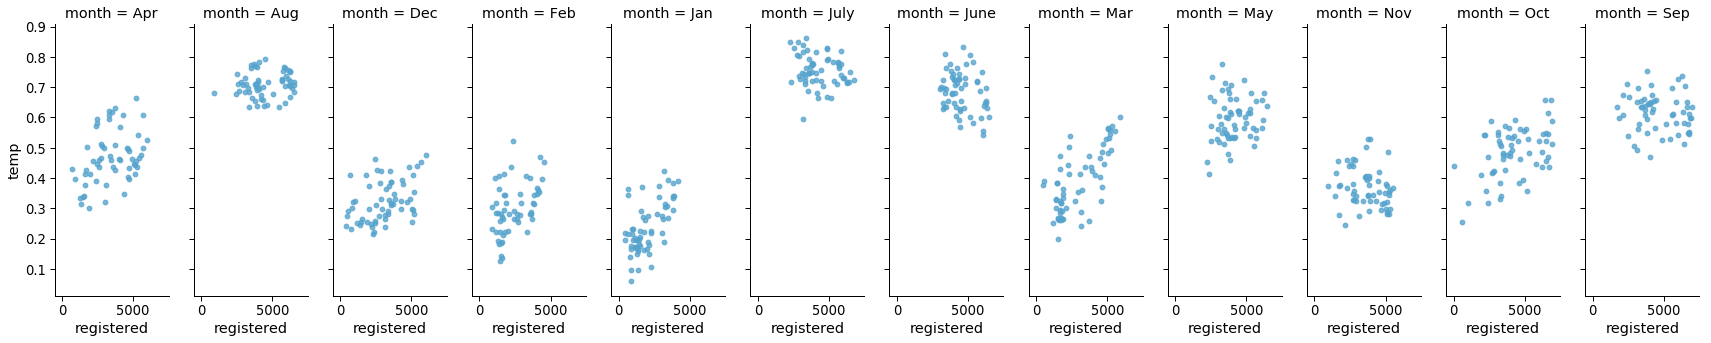

In [110]:
plt.figure(figsize=(10,14))
sns.lmplot('casual','temp',col='month',data=bike_rental,fit_reg=False, height=5, aspect=0.4,)
sns.lmplot('registered','temp',col='month',data=bike_rental,fit_reg=False, height=5, aspect=0.4)

## Relastionship between Rentals and Weather 

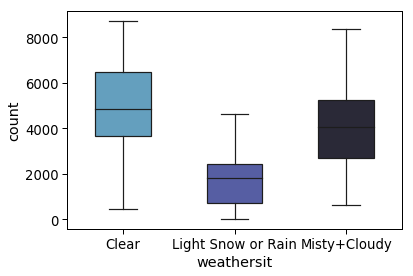

,weathersit,total_rentals
0,Clear,2257952.0
1,Light Snow or Rain,37869.0
2,Misty+Cloudy,996858.0


In [111]:
#grouping by weather and plot the box plot
sns.boxplot(y='count',x='weathersit',data=bike_rental,width=0.5,)
plt.show()

bike_rental.groupby("weathersit")["count"].sum().reset_index(name="total_rentals")

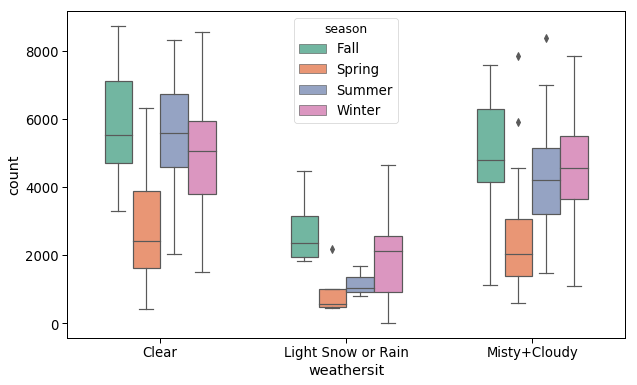

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(y='count',x='weathersit',data=bike_rental,hue="season",width=0.6,palette="Set2")

## Seasons

In [113]:
bike_rental.groupby("season")["count"].sum().reset_index(name="total_rentals")

,season,total_rentals
0,Fall,1061129.0
1,Spring,471348.0
2,Summer,918589.0
3,Winter,841613.0


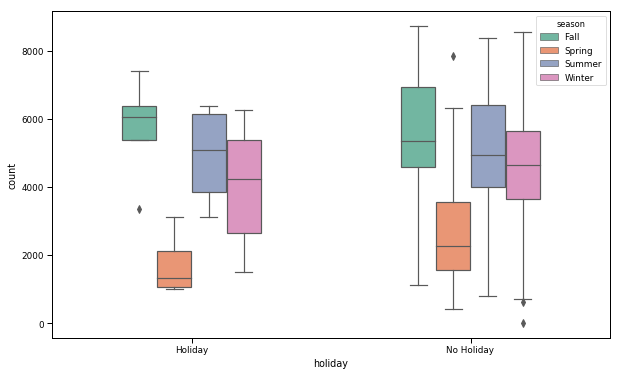

In [114]:
#group by season and see the difference between holiday and non-holiday
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1)
sns.boxplot(y='count',x='holiday',data=bike_rental,hue="season",width=0.5,palette="Set2")

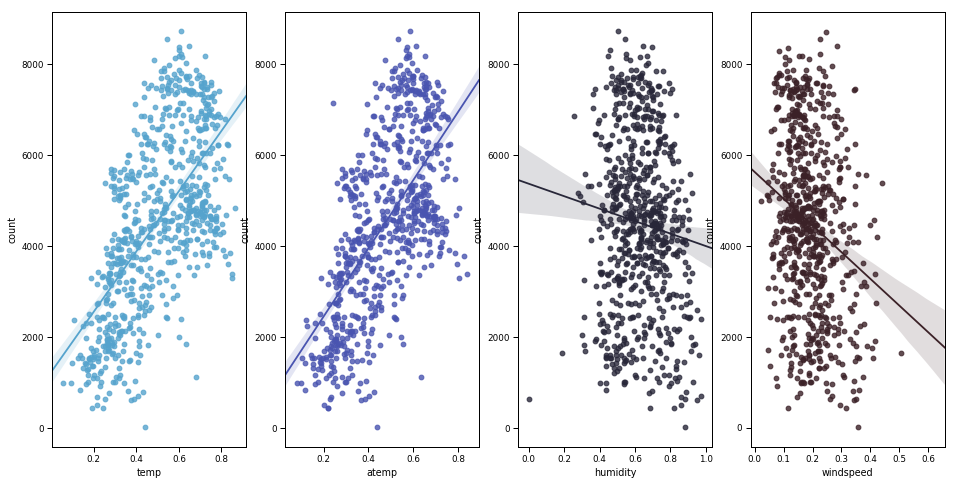

In [115]:
# Bivariate analysis of count and continous predictor

fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(16,8)

sns.regplot(x="temp",y="count",data=bike_rental,ax=ax1)
sns.regplot(x="atemp",y="count",data=bike_rental,ax=ax2)
sns.regplot(x="humidity",y="count",data=bike_rental,ax=ax3)
sns.regplot(x="windspeed",y="count",data=bike_rental,ax=ax4)


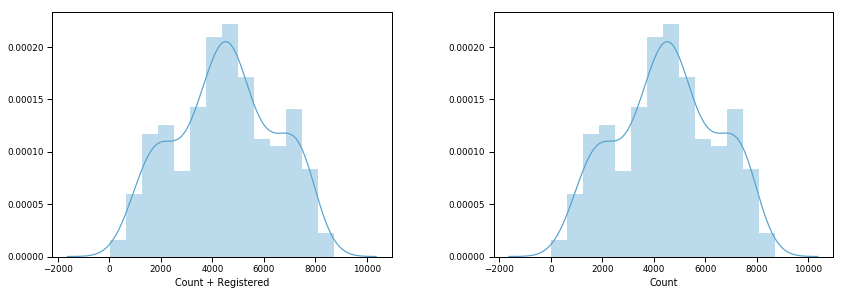

In [116]:
sum_reg_casual = bike_rental["casual"] + bike_rental["registered"]


fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_size_inches(14,4.5)

sns.distplot(sum_reg_casual, ax = ax1, axlabel="Count + Registered")
sns.distplot(bike_rental["count"], ax = ax2, axlabel = "Count")

# Correlation Analysis

In [117]:
bike_rental.corr()['count'].sort_values(ascending=False)


count         1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
humidity     -0.100659
windspeed    -0.234545
Name: count, dtype: float64

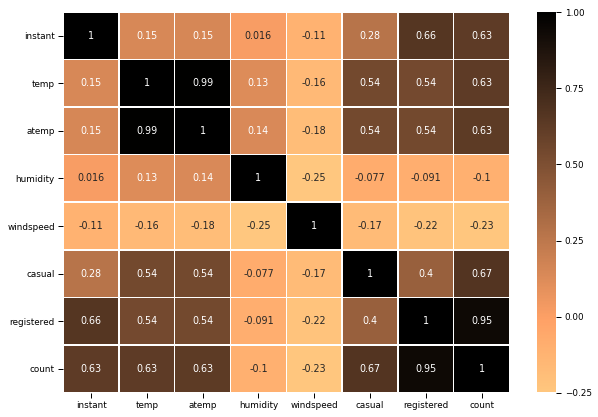

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(bike_rental.corr(), annot=True, cmap="copper_r",linewidths=.5)

In [119]:
# checking VIF for multicolinerity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_bike_rental = add_constant(bike_rental.iloc[:,9:15])
pd.Series([variance_inflation_factor(VIF_bike_rental.values, i) 
               for i in range(VIF_bike_rental.shape[1])], 
              index=VIF_bike_rental.columns)

/home/woodman/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         53.187701
temp          63.104923
atemp         63.984072
humidity       1.185795
windspeed      1.189058
casual         1.508658
registered     1.552572
dtype: float64

In [120]:
from scipy.stats import chi2_contingency

# making every combinationfrom cat_columns
factors_paired = [(i,j) for i in categorical_variable for j in categorical_variable]
factors_paired
p_values = [] 
from scipy.stats import chi2_contingency 
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(bike_rental[factor[0]], bike_rental[factor[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-') 
p_values = np.array(p_values).reshape((7,7))
p_values = pd.DataFrame(p_values, index=categorical_variable, columns=categorical_variable)
print(p_values)

           season   year  month holiday weekday workingday weathersit
season          -    1.0    0.0   0.683     1.0      0.887      0.021
year          1.0      -    1.0   0.995     1.0       0.98      0.127
month         0.0    1.0      -   0.559     1.0      0.993      0.015
holiday     0.683  0.995  0.559       -     0.0        0.0      0.601
weekday       1.0    1.0    1.0     0.0       -        0.0      0.278
workingday  0.887   0.98  0.993     0.0     0.0          -      0.254
weathersit  0.021  0.127  0.015   0.601   0.278      0.254          -


# Dropping Variables

*  'dteday' since it doesnt help in prediction and also we have covered all the necessary factors in 'season','year','month'
*   From heatmap and VIF, Removing variables atemp beacuse it is highly correlated with temp,
* From chi2, Removing weekday, holiday because they don't contribute much to the independent cariable
* 'casual' and 'registered' since its aggregation sum results to 'count' and we have to predict 'count' using other 

In [121]:

bike_rental = bike_rental.drop(['atemp','casual','registered','date', "instant", 'weekday', 'holiday'], axis=1)


### Rollback understandable text to numbers 

In [122]:
# Rollback understandable text to numbers 
season_dict = { 'Spring' :'1', 'Summer' :'2', 'Fall' : '3', 'Winter' : '4'}
weather_dict = { 'Clear' :'1', 'Misty+Cloudy' : '2', 'Light Snow or Rain' : '3'}
month_dict = {'Jan' : '1', 'Feb' : '2', 'Mar' :'3', 'Apr' : '4', 'May' : '5', 'June' :'6', 'July' : '7', 'Aug' : '8', 'Sep' : '9', 'Oct' : '10', 'Nov' : '11', 'Dec' :'12'}
year_dict = { '2011' : '0', '2012' : '1'}
workingday_dict = {'Working Day':'1', 'No Working Day': '0'}

bike_rental['season'] = bike_rental['season'].map(season_dict)
bike_rental['weathersit'] = bike_rental['weathersit'].map(weather_dict)
bike_rental['month'] = bike_rental['month'].map(month_dict)
bike_rental['year'] = bike_rental['year'].map(year_dict)
bike_rental['workingday'] = bike_rental['workingday'].map(workingday_dict)

bike_rental.head()

,season,year,month,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,1,0.226957,0.436957,0.186900,1600.0


# Outliers


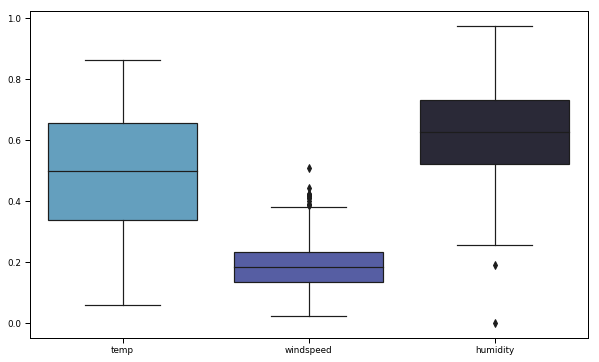

In [123]:
# checking boxplot of continous variables
plt.figure(figsize=(10,6))
sns.boxplot(data=bike_rental[['temp','windspeed','humidity']])

In [124]:
#Converting variables datatype to required datatypes

bike_rental['season'] = bike_rental['season'].astype(str)
bike_rental['year']     = bike_rental['year'].astype(str)
bike_rental['month']   = bike_rental['month'].astype(str)
bike_rental['workingday']= bike_rental['workingday'].astype(str)
bike_rental['weathersit']= bike_rental['weathersit'].astype(str)

In [125]:
bike_rental.dtypes

season         object
year           object
month          object
workingday     object
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count         float64
dtype: object

# Missing value 

In [126]:
# from the boxplot analysis, it is clear that continous variables windspeed, hum and casual includes the outliers.
# but we are not considering casual because this is not predictor variable.

count_names = ['windspeed','humidity']
for i in count_names:
    print (i)
    q75,q25 = np.percentile(bike_rental.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print (min)
    print (max)
    
    bike_rental.loc[bike_rental[i]<min,i]=np.nan
    bike_rental.loc[bike_rental[i]>max,i]=np.nan

windspeed
-0.012446750000000034
0.38061125
humidity
0.20468725
1.0455212500000002


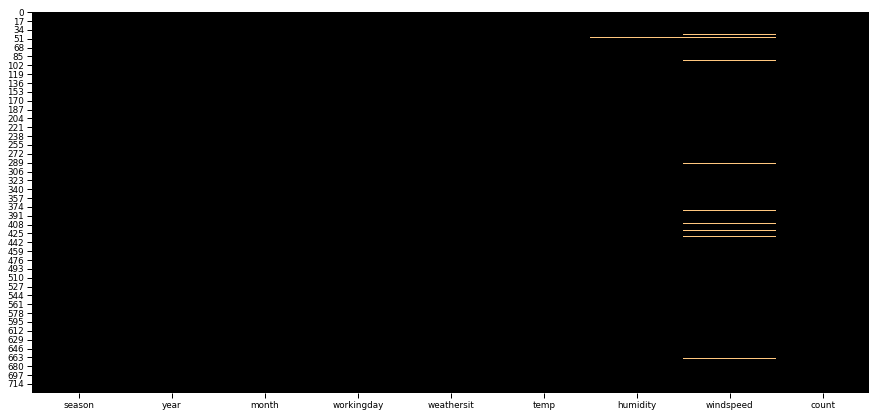

In [128]:
plt.figure(figsize=(15,7))
sns.heatmap(bike_rental.isnull(), cbar=False, cmap="copper")

In [129]:
bike_rental.isnull().sum()

season         0
year           0
month          0
workingday     0
weathersit     0
temp           0
humidity       2
windspeed     13
count          0
dtype: int64

In [130]:
#taking copy of the data

bike_rental_copy = bike_rental.copy()
#bike_rental = bike_rental_copy.copy()

In [131]:
# from sklearn.impute import KNNImputer

In [132]:
# imputer = KNNImputer(n_neighbors=3)
# imputer.fit_transform(bike_rental)

In [133]:
bike_rental = bike_rental.dropna(axis = 0)

In [134]:
bike_rental.isnull().sum()

season        0
year          0
month         0
workingday    0
weathersit    0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

# Scaling and Normalization

In [54]:
# #Normalisation
# for i in col_names:
#     print(i)
#     bike_rental[i] = (bike_rental[i] - bike_rental[i].min())/(bike_rental[i].max()) - bike_rental[i].min()

In [55]:
# fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
# fig.subplots_adjust(hspace=0.5, wspace=0.3)
# fig.set_size_inches(14,4.5)

# sns.distplot(bike_rental["humidity"], ax = ax1, axlabel = "humidity")
# sns.distplot(bike_rental["windspeed"], ax = ax2, axlabel = "windspeeed")
# sns.distplot(bike_rental["temp"], ax = ax3, axlabel = "temp")

In [56]:
# #Standarisation
# for i in col_names:
#     print(i)
#     bike_rental[i] = (bike_rental[i] - bike_rental[i].mean())/bike_rental[i].std()

In [57]:
# fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
# fig.subplots_adjust(hspace=0.5, wspace=0.3)
# fig.set_size_inches(14,4.5)

# sns.distplot(bike_rental["humidity"], ax = ax1, axlabel = "humidity")
# sns.distplot(bike_rental["windspeed"], ax = ax2, axlabel = "windspeeed")
# sns.distplot(bike_rental["temp"], ax = ax3, axlabel = "temp")

In [58]:
bike_rental.head()

,season,year,month,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,1,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,1,1,0.226957,0.436957,0.186900,1600.0


In [135]:
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 730
Data columns (total 9 columns):
season        717 non-null object
year          717 non-null object
month         717 non-null object
workingday    717 non-null object
weathersit    717 non-null object
temp          717 non-null float64
humidity      717 non-null float64
windspeed     717 non-null float64
count         717 non-null float64
dtypes: float64(4), object(5)
memory usage: 56.0+ KB


In [60]:
bike_rental.to_csv("bike_rental_clean1.csv")